In this notebook we will be exploring the training set to find insights in the data.

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in Data

In [2]:
df = pd.read_csv('training_data.csv', index_col=[0])

In [15]:
df.info()
df.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 1 to 697
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8364 non-null   object 
 1   datetime          8364 non-null   object 
 2   tempmax           8364 non-null   float64
 3   tempmin           8364 non-null   float64
 4   temp              8364 non-null   float64
 5   feelslikemax      8364 non-null   float64
 6   feelslikemin      8364 non-null   float64
 7   feelslike         8364 non-null   float64
 8   dew               8364 non-null   float64
 9   humidity          8364 non-null   float64
 10  precip            8364 non-null   float64
 11  precipprob        0 non-null      float64
 12  precipcover       8364 non-null   float64
 13  preciptype        0 non-null      float64
 14  snow              8364 non-null   float64
 15  snowdepth         8364 non-null   float64
 16  windgust          6153 non-null   float64
 

# Exploratory Data Analysis

C:\Users\lmoran\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


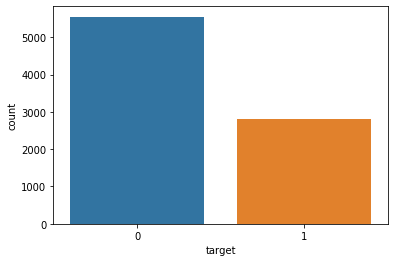

In [20]:
sns.countplot(df['target'])

We see that the dataset is not too unbalanced, so we are fine to move forward with the dataset.

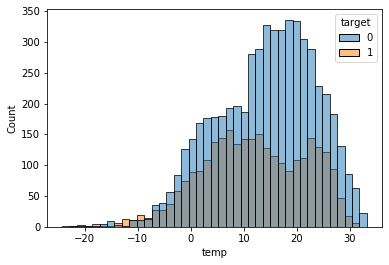

In [17]:
df['target'] = df['target'].astype('object')
sns.histplot(data=df,x='temp',hue='target')

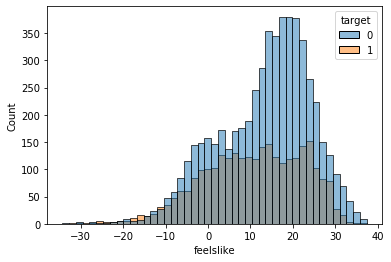

In [21]:
sns.histplot(data=df,x='feelslike',hue='target')

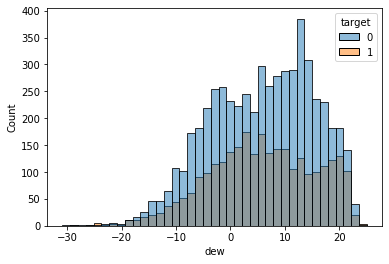

In [28]:
sns.histplot(data=df,x='dew',hue='target')

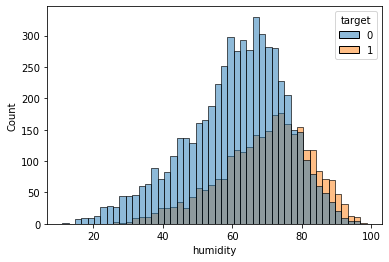

In [29]:
sns.histplot(data=df,x='humidity',hue='target')

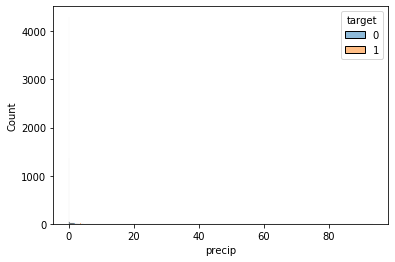

In [30]:
sns.histplot(data=df,x='precip',hue='target')

In [38]:
raining = df[df['target'] == 1]
not_raining = df[df['target'] == 0]

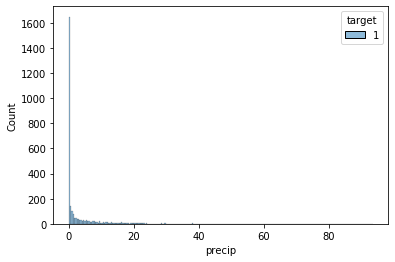

In [37]:
sns.histplot(data=raining,x='precip',hue='target')

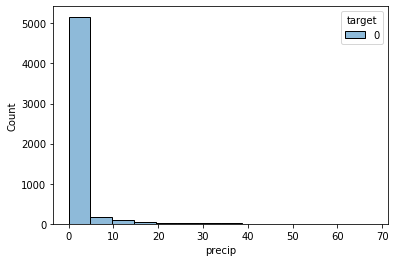

In [39]:
sns.histplot(data=not_raining,x='precip',hue='target')

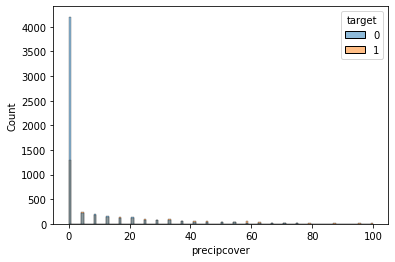

In [40]:
sns.histplot(data=df,x='precipcover',hue='target')

In [41]:
df.precipcover.value_counts()

0.00      5498
4.17       443
8.33       387
12.50      284
20.83      257
16.67      250
25.00      187
29.17      157
33.33      156
37.50      126
41.67      100
45.83       97
50.00       84
54.17       72
58.33       60
62.50       36
75.00       33
70.83       33
66.67       32
79.17       17
100.00      12
83.33       11
87.50        9
95.83        8
91.67        4
4.35         2
32.00        2
36.00        1
21.74        1
26.09        1
73.91        1
8.70         1
4.00         1
39.13        1
Name: precipcover, dtype: int64

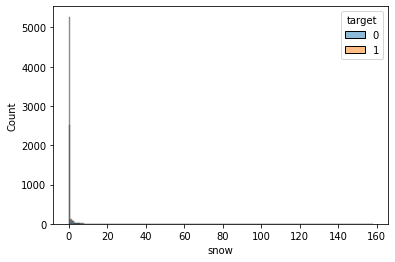

In [45]:
sns.histplot(data=df,x='snow',hue='target',binwidth=1)

In [46]:
df.snow.max()

157.5

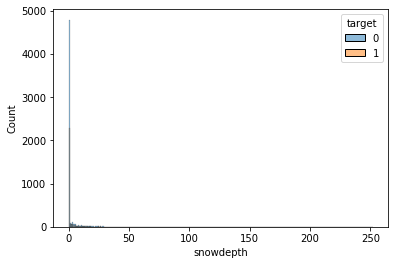

In [47]:
sns.histplot(data=df,x='snowdepth',hue='target',binwidth=1)

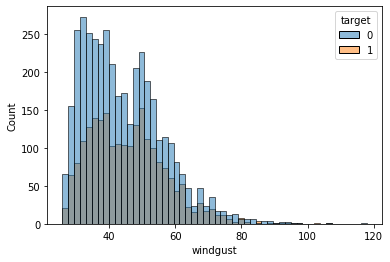

In [48]:
sns.histplot(data=df,x='windgust',hue='target')

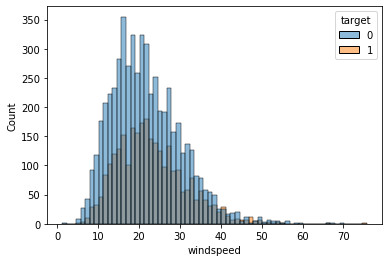

In [49]:
sns.histplot(data=df,x='windspeed',hue='target')

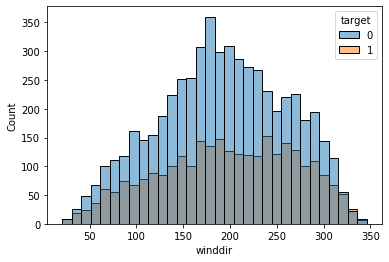

In [51]:
sns.histplot(data=df,x='winddir',hue='target')

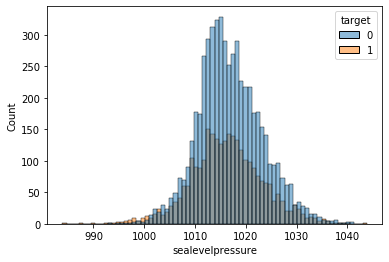

In [52]:
sns.histplot(data=df,x='sealevelpressure',hue='target')

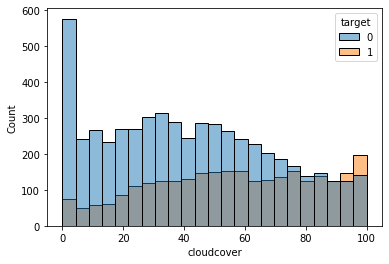

In [53]:
sns.histplot(data=df,x='cloudcover',hue='target')

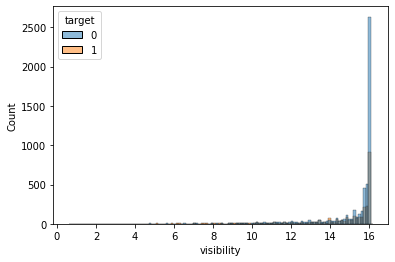

In [54]:
sns.histplot(data=df,x='visibility',hue='target')

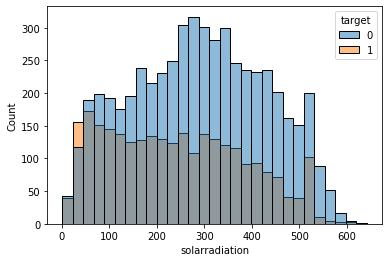

In [55]:
sns.histplot(data=df,x='solarradiation',hue='target')

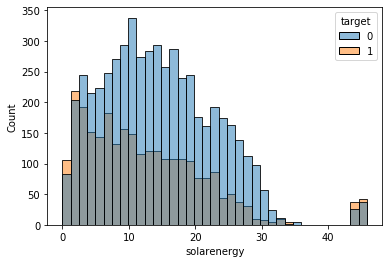

In [56]:
sns.histplot(data=df,x='solarenergy',hue='target')

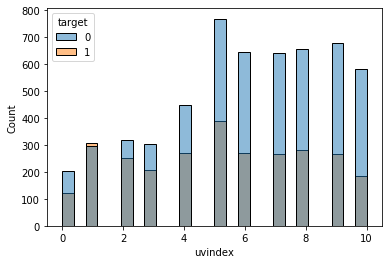

In [57]:
sns.histplot(data=df,x='uvindex',hue='target')

In [89]:
df['sunrise2'] = df['sunrise'].apply(lambda x: x[-5:])
df['sunrise2'] = df['sunrise2'].apply(lambda x: '0'+x if len(x)==4 else x)
df['sunrise2'] = df['sunrise2'].apply(lambda x: str(int(x[:2])-24)+x[-3:] if int(x[:2]) >= 24 else x)
df['sunrise2'] = pd.to_datetime(df['sunrise2'])

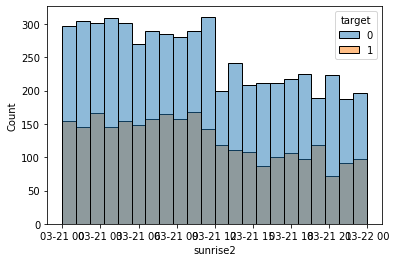

In [90]:
sns.histplot(data=df,x='sunrise2',hue='target')

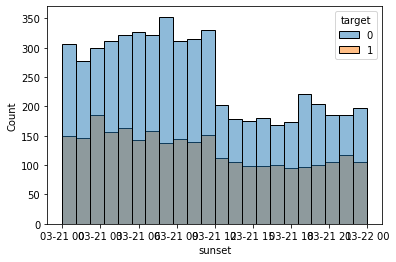

In [92]:
df['sunset'] = df['sunset'].apply(lambda x: x[-5:])
df['sunset'] = df['sunset'].apply(lambda x: '0'+x if len(x)==4 else x)
df['sunset'] = df['sunset'].apply(lambda x: str(int(x[:2])-24)+x[-3:] if int(x[:2]) >= 24 else x)
df['sunset'] = pd.to_datetime(df['sunset'])
sns.histplot(data=df,x='sunset',hue='target')

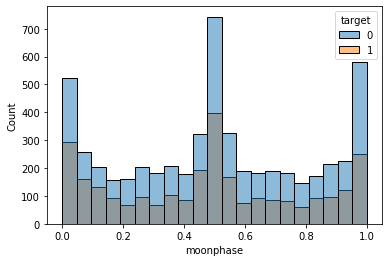

In [93]:
sns.histplot(data=df,x='moonphase',hue='target')

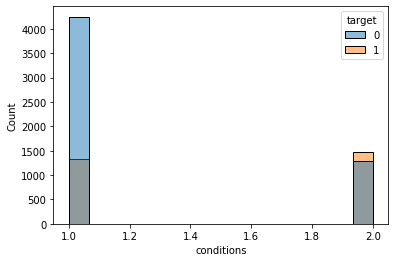

In [98]:
df['conditions'] = df['conditions'].apply(lambda x: len(x.split(',')))
df['conditions'].value_counts()
sns.histplot(data=df,x='conditions',hue='target')

In [100]:
df.icon

0                    rain
1       partly-cloudy-day
2                    rain
3                    rain
4       partly-cloudy-day
              ...        
8359                 wind
8360                 wind
8361                 wind
8362                 wind
8363                 wind
Name: icon, Length: 8364, dtype: object

List of changes for pipeline from observations from this EDA <br>
1. Add temp more than feels like <br>
2. Drop preciptype, precipprob, severerisk, and description, icon, stations <br>
3. Add if precipcover is over 75 <br>4.Scale features <br> 
5. Most important features: cloudcover, humidity <br>
6. Convert sunset and sunrise
7. Create number of conditions column